/tmp/ipykernel_37674/639236862.py:114: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


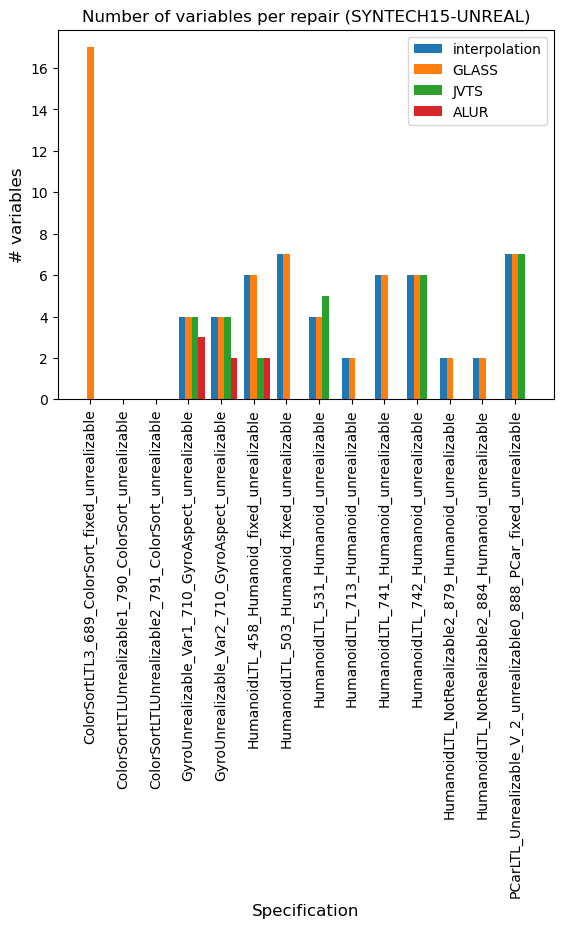

In [50]:
# Sample data
categories = [
    "ColorSortLTL3_689_ColorSort_fixed_unrealizable",
    "ColorSortLTLUnrealizable1_790_ColorSort_unrealizable",
    "ColorSortLTLUnrealizable2_791_ColorSort_unrealizable",
    "GyroUnrealizable_Var1_710_GyroAspect_unrealizable",
    "GyroUnrealizable_Var2_710_GyroAspect_unrealizable",
    "HumanoidLTL_458_Humanoid_fixed_unrealizable",
    "HumanoidLTL_503_Humanoid_fixed_unrealizable",
    "HumanoidLTL_531_Humanoid_unrealizable",
    "HumanoidLTL_713_Humanoid_unrealizable",
    "HumanoidLTL_741_Humanoid_unrealizable",
    "HumanoidLTL_742_Humanoid_unrealizable",
    "HumanoidLTL_NotRealizable2_879_Humanoid_unrealizable",
    "HumanoidLTL_NotRealizable2_884_Humanoid_unrealizable",
    "PCarLTL_Unrealizable_V_2_unrealizable0_888_PCar_fixed_unrealizable",
]

interpolation_values = [
    0,
    0,
    0,
    4,
    4,
    6,
    7,
    4,
    2,
    6,
    6,
    2,
    2,
    7,
]

glass_values = [
    17,
    0,
    0,
    4,
    4,
    6,
    7,
    4,
    2,
    6,
    6,
    2,
    2,
    7,
]

jvts_values = [
    0,
    0,
    0,
    4,
    4,
    2,
    0,
    5,
    0,
    0,
    6,
    0,
    0,
    7,
]

alur_values = [
    0,
    0,
    0,
    3,
    2,
    2,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
]

# Number of categories
num_categories = len(categories)

# X-axis positions for the bars
x = np.arange(num_categories)

# Bar width
bar_width = 0.2

# Create subplots
fig, ax = plt.subplots()

# Create bars for each value set
ax.bar(x - bar_width, interpolation_values, bar_width, label='interpolation')
ax.bar(x, glass_values, bar_width, label='GLASS')
ax.bar(x + bar_width, jvts_values, bar_width, label='JVTS')
ax.bar(x + bar_width * 2, alur_values, bar_width, label='ALUR')

# Set labels, title, and legend
ax.set_xlabel('Specification', fontsize=12)
ax.set_ylabel('# variables', fontsize=12)
ax.set_title('Number of variables per repair (SYNTECH15-UNREAL)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

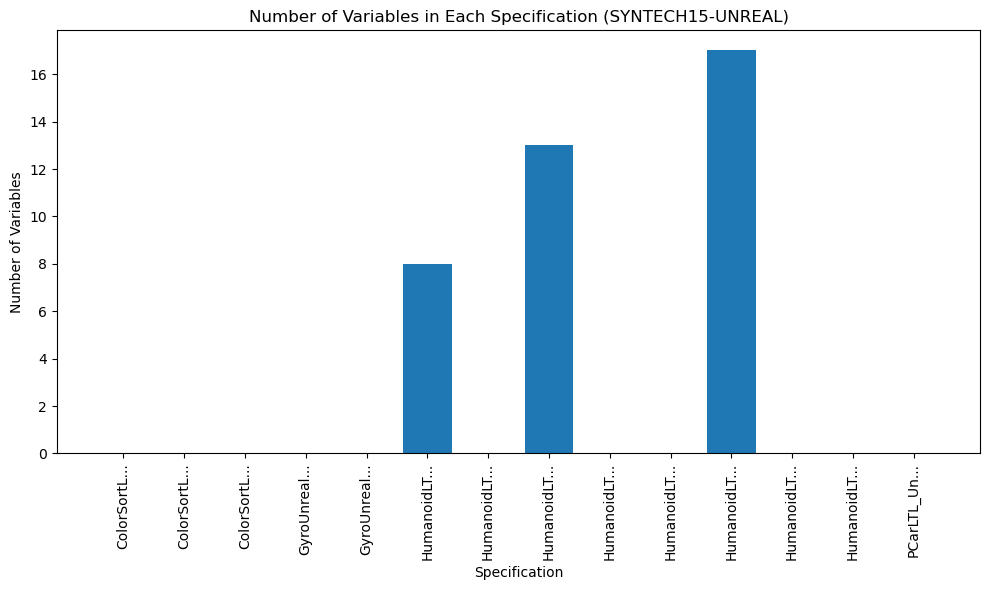

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV file into a DataFrame
csv_file = "Examples/SYNTECH15-UNREAL/repairs/output.csv"
df = pd.read_csv(csv_file)

# Extract data from DataFrame
df['specification'] = [os.path.splitext(os.path.basename(filename))[0] for filename in df['specification']]
df['specification'] = [spec[:10] + '...' if len(spec) > 10 else spec for spec in df['specification']]

numVariables = df["numRepairs"]
numVariables = df["numVariables"]
weakness = df["weakness"]

plt.figure(figsize=(10, 6))
plt.bar(range(len(df)), df['numVariables'])
plt.xlabel('Specification')
plt.ylabel('Number of Variables')
plt.title('Number of Variables in Each Specification (SYNTECH15-UNREAL)')
plt.xticks(range(len(df)), df['specification'], rotation=90)

plt.tight_layout()

# Show the plot
plt.show()

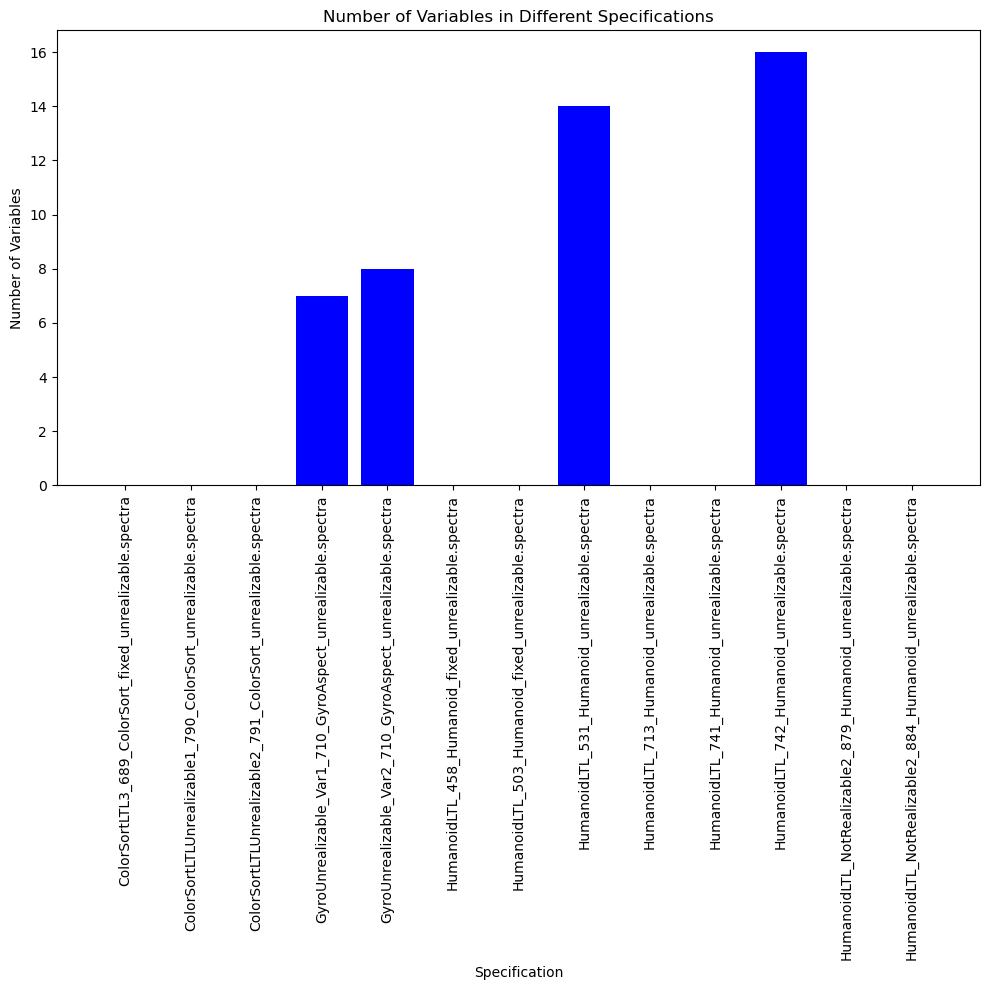

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Examples/SYNTECH15/repairs-jvts-translated/outputt.csv')

# Extract relevant columns
specification = df['specification']
numVariables = df['numVariables']

# Plot the data
plt.figure(figsize=(10, 10))
plt.bar(specification, numVariables, color='blue')
plt.xlabel('Specification')
plt.ylabel('Number of Variables')
plt.title('Number of Variables in Different Specifications')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

In [13]:
algorithms = {
    'GLASS': 'Examples/SYNTECH15/repairs-glass/outputt.csv',
    'JVTS': 'Examples/SYNTECH15/repairs-jvts-translated/outputt.csv',
    'ALUR': 'Examples/SYNTECH15/repairs-alur/outputt.csv'
}

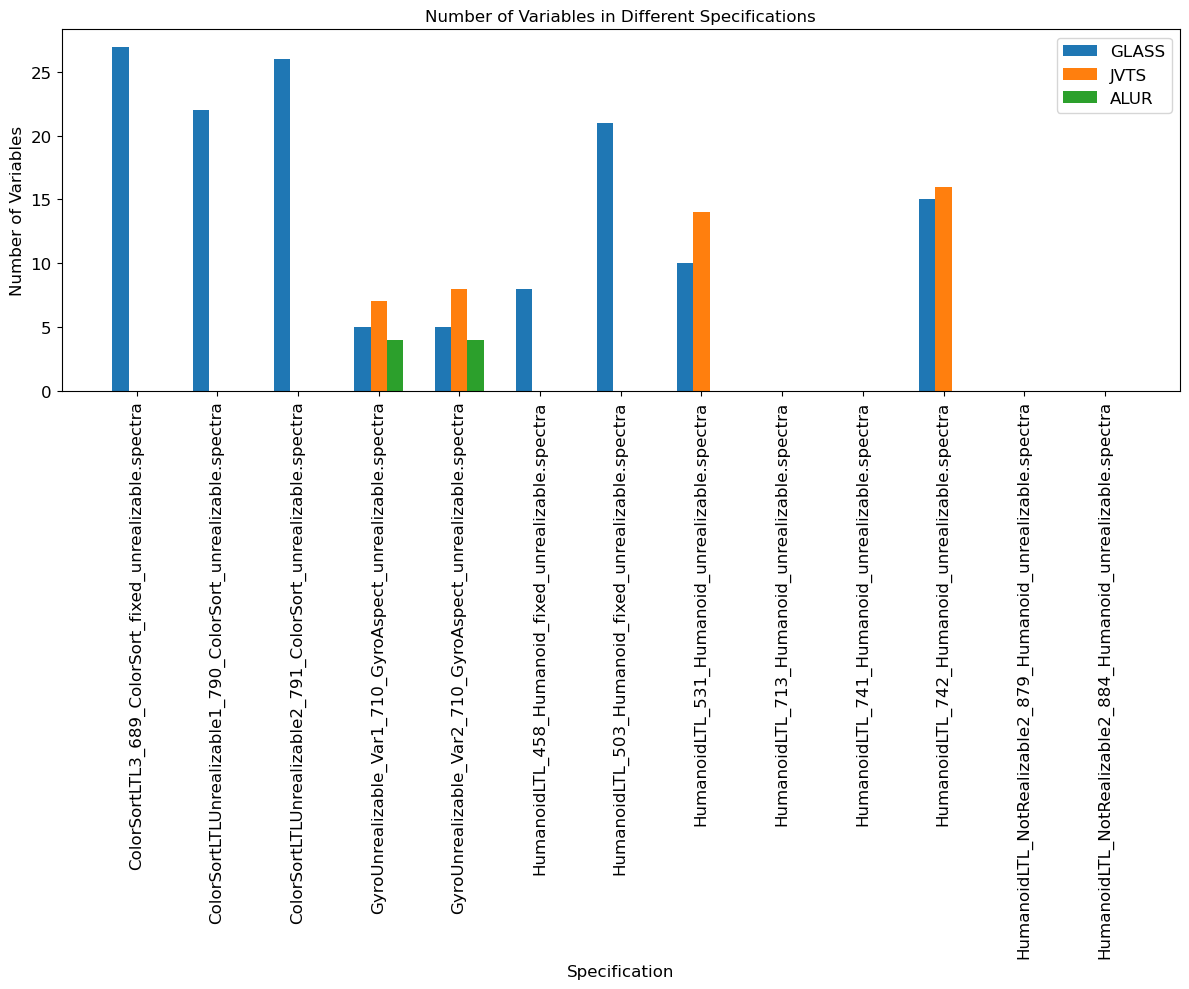

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create an empty dictionary to store dataframes
dataframes = {}

# Read the CSV files and store dataframes in the dictionary
for algorithm, file in algorithms.items():
    dataframes[algorithm] = pd.read_csv(file)

# Extract data for plotting
specifications = dataframes[list(dataframes.keys())[0]]['specification']
num_algorithms = len(algorithms)

# Set up the positions for the bars
bar_width = 0.2
bar_positions = np.arange(len(specifications))

# Plot the data
plt.figure(figsize=(12, 10))
for i, (algorithm, df) in enumerate(dataframes.items()):
    plt.bar(
        bar_positions + (i - (num_algorithms - 1) / 2) * bar_width,
        df['numVariables'],
        width=bar_width,
        label=algorithm
    )

plt.xlabel('Specification', fontsize=12)
plt.ylabel('Number of Variables', fontsize=12)
plt.title('Number of Variables in Different Specifications', fontsize=12)
plt.xticks(bar_positions, specifications, rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


In [9]:
# List of your CSV files for each algorithm along with custom algorithm names
from weakness_for_refinement import Weakness

algorithm_data = [
    {'file': 'Examples/SYNTECH15/repairs-glass/outputt.csv', 'name': 'GLASS'},
    {'file': 'Examples/SYNTECH15/repairs-jvts/outputt.csv', 'name': 'JVTS'},
    {'file': 'Examples/SYNTECH15/repairs-alur/outputt.csv', 'name': 'ALUR'}
]

In [41]:
def quantify_weakness(weakness):
        # Assign weights to attributes based on their importance in ordering
        weight_d1 = 1.0
        weight_d2 = 0.75
        weight_nummaxentropysccs = 0.5
        weight_d3 = 0.25
        
        # Calculate a quantified value based on the weighted attributes
        quantified_value = (
            weight_d1 * weakness.d1 +
            weight_d2 * weakness.d2
        )
        
        if weakness.nummaxentropysccs != float('-inf'):
            quantified_value += weight_nummaxentropysccs * weakness.nummaxentropysccs
            
        if weakness.d3 != float('-inf'):
            quantified_value += weight_d3 * weakness.d3
        
        # Set quantified_value to 0 if it's equal to -inf
        if quantified_value == float('-inf'):
            quantified_value = 0

        return quantified_value

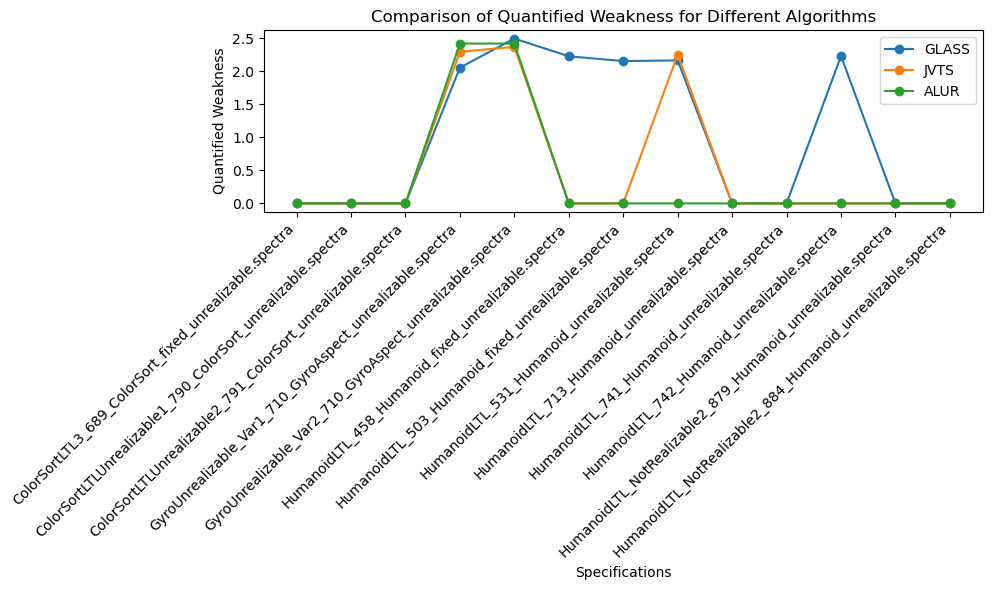

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Read and process data from each CSV file
data = []
for entry in algorithm_data:
    df = pd.read_csv(entry['file'])
    algorithm_name = entry['name']

    # Extract specification names and Weakness values
    for _, row in df.iterrows():
        spec_name = row['specification']
        weakness = Weakness(row['d1'], row['d2'], row['nummaxentropysccs'], row['d3'])
#         print(weakness)
        quantified_value = quantify_weakness(weakness)
#         print(quantified_value)
        data.append({'algorithm': algorithm_name, 'specification': spec_name, 'weakness': quantified_value})

# Create a DataFrame for easy manipulation
df = pd.DataFrame(data)

# Create a line chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for algorithm in df['algorithm'].unique():
    algorithm_df = df[df['algorithm'] == algorithm]
    plt.plot(algorithm_df['specification'], algorithm_df['weakness'], marker='o', label=algorithm)

# Customize the plot
plt.xlabel('Specifications')
plt.ylabel('Quantified Weakness')
plt.title('Comparison of Quantified Weakness for Different Algorithms')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()


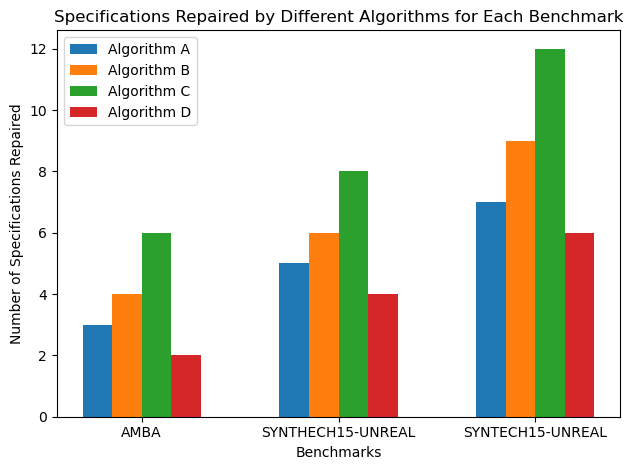

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Benchmark names and their respective specifications count
benchmarks = ['AMBA', 'SYNTHECH15-UNREAL', 'SYNTECH15-UNREAL']
specs_count = [9, 14, 78]

# Algorithm names
algorithms = ['Algorithm A', 'Algorithm B', 'Algorithm C', 'Algorithm D']

# Number of specifications repaired for each algorithm and benchmark
# Replace these values with your actual data
data = [
    [3, 5, 7],
    [4, 6, 9],
    [6, 8, 12],
    [2, 4, 6]
]

# Convert the data into a numpy array for plotting
data_array = np.array(data)

# Create a bar plot for each algorithm
width = 0.15  # Width of each bar
offsets = np.arange(len(benchmarks))

for i, algorithm in enumerate(algorithms):
    plt.bar(offsets + (i * width), data_array[i], width=width, label=algorithm)

# Adding labels and title
plt.xlabel('Benchmarks')
plt.ylabel('Number of Specifications Repaired')
plt.title('Specifications Repaired by Different Algorithms for Each Benchmark')
plt.xticks(offsets + width * (len(algorithms) - 1) / 2, benchmarks)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [96]:
# folder_directory = "outputs/AMBA"
# folder_directory = "outputs/SYNTECH15-UNREAL/"
folder_directory = "outputs/SYNTECH15-1UNREAL/interpolation"

In [97]:
import os
import pandas as pd

output_filename = "repairs_summary.csv"

# Output CSV file path
output_file = os.path.join(folder_directory, output_filename)

# Initialize a list to hold DataFrames for each CSV file
data_frames = []

# Iterate through each CSV file in the input directory
for filename in os.listdir(folder_directory):
    if filename.endswith(".csv") and filename != output_filename:
        filepath = os.path.join(folder_directory, filename)
        df = pd.read_csv(filepath, sep=";")
        
        # Extract the spec name from the filename
        spec_name = os.path.splitext(filename)[0]
        
        # Calculate the number of repairs for the spec
        num_repairs = len(df)
        
        # Create a DataFrame with spec name and num_repairs
        data = {"Specification": [spec_name], "NumRepairs": [num_repairs]}
        spec_df = pd.DataFrame(data)
        
        # Append the DataFrame to the list
        data_frames.append(spec_df)

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(data_frames, ignore_index=True)

# Sort the DataFrame by the "Specification" column
combined_data = combined_data.sort_values(by="Specification")

# Save the combined data to the output CSV file
combined_data.to_csv(output_file, index=False)
print(f"Combined data saved to {output_file}")


Combined data saved to outputs/SYNTECH15-1UNREAL/interpolation/specification_repairs.csv


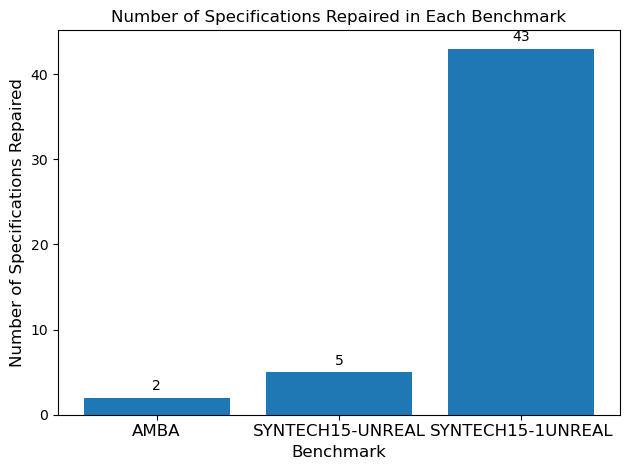

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a dictionary with benchmark names and corresponding CSV file paths
benchmark_files = {
    "AMBA": "outputs/AMBA/specification_repairs.csv",
    "SYNTECH15-UNREAL": "outputs/SYNTECH15-UNREAL/specification_repairs.csv",
    "SYNTECH15-1UNREAL": "outputs/SYNTECH15-1UNREAL/interpolation/specification_repairs.csv",
    # Add more benchmarks and file paths as needed
}

# Initialize a dictionary to store the number of repaired specifications for each benchmark
benchmark_counts = {}

# Iterate through the benchmark files and calculate the number of repaired specifications
for benchmark, file_path in benchmark_files.items():
    df = pd.read_csv(file_path)
    repaired_specs = df[df["NumRepairs"] > 0]
    num_repaired = len(repaired_specs)
    benchmark_counts[benchmark] = num_repaired

# Create a bar plot
plt.bar(benchmark_counts.keys(), benchmark_counts.values())
plt.xlabel("Benchmark", fontsize=12)
plt.ylabel("Number of Specifications Repaired", fontsize=12)
plt.title("Number of Specifications Repaired in Each Benchmark", fontsize=12)
plt.xticks(fontsize=12)

# Add numbers above each bar
for benchmark, count in benchmark_counts.items():
    plt.text(benchmark, count + 0.5, str(count), ha="center", va="bottom", fontsize=10)


# Display the plot
plt.tight_layout()
plt.show()

In [99]:
import pandas as pd
import re

# Read the CSV file
df = pd.read_csv("outputs/SYNTECH15-UNREAL/GyroUnrealizable_Var1_710_GyroAspect_unrealizable_interpolation-bfs_exptacas20_duplicatecheck.csv", delimiter=";")

print(df['Id'])
print(df['UniqueRefinement'])
print(df['NumVariables'])



FileNotFoundError: [Errno 2] No such file or directory: 'outputs/SYNTECH15-UNREAL/GyroUnrealizable_Var1_710_GyroAspect_unrealizable_interpolation-bfs_exptacas20_duplicatecheck.csv'

In [1]:
import re

def count_num_variables(assumptions):
    total_variables = set()
    
    assumptions = [re.sub(r"G\(F\s*\((.*)\)\)", r"\1", x) for x in assumptions]
    assumptions = [re.sub(r"G\((.*)\)", r"\1", x) for x in assumptions]
    assumptions = [re.sub(r"X\((.*)\)", r"\1", x) for x in assumptions]
    
    for assumption in assumptions:
        print(assumption)
        assumption = re.sub(r'G\((.*)\)|X\((.*)\)|G\(F\((.*)\)\)', r'\1', assumption)
        variables = re.findall(r'\b\w+\b', assumption)
        print(variables)
        total_variables.update(variables)
        print("TOT: ", total_variables)

    return len(total_variables)

# Example list of assumptions lists
assumptions_list = ['G((!sYS_CONSTRAINT_0_respondsTo_responded) -> X(!(!sYS_CONSTRAINT_0_respondsTo_responded)))',
                     'G((!sYS_CONSTRAINT_1_respondsTo_responded) -> X(!(!sYS_CONSTRAINT_1_respondsTo_responded)))']

total_num_vars = count_num_variables(assumptions_list)
print(f"Total number of unique variables across all assumptions: {total_num_vars}")


(!sYS_CONSTRAINT_0_respondsTo_responded) -> !(!sYS_CONSTRAINT_0_respondsTo_responded)
['sYS_CONSTRAINT_0_respondsTo_responded', 'sYS_CONSTRAINT_0_respondsTo_responded']
TOT:  {'sYS_CONSTRAINT_0_respondsTo_responded'}
(!sYS_CONSTRAINT_1_respondsTo_responded) -> !(!sYS_CONSTRAINT_1_respondsTo_responded)
['sYS_CONSTRAINT_1_respondsTo_responded', 'sYS_CONSTRAINT_1_respondsTo_responded']
TOT:  {'sYS_CONSTRAINT_0_respondsTo_responded', 'sYS_CONSTRAINT_1_respondsTo_responded'}
Total number of unique variables across all assumptions: 2


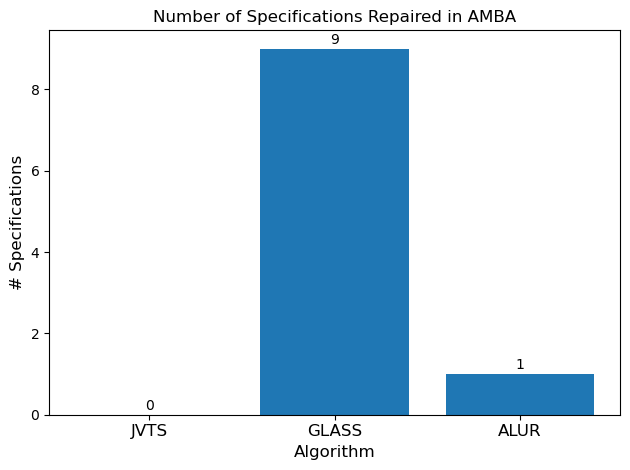

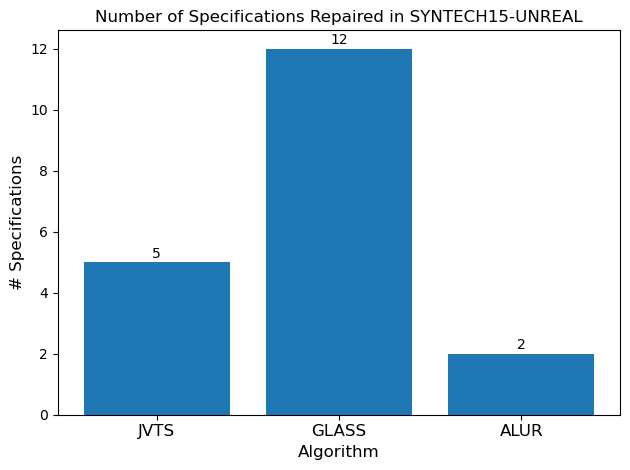

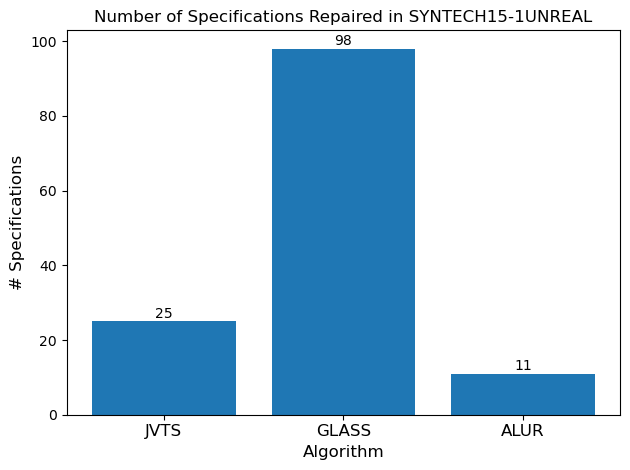

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# List of input folders
INPUT_FOLDERS = [
    "inputs/AMBA",
    "inputs/SYNTECH15-UNREAL",
    "inputs/SYNTECH15-1UNREAL"
]

# List of algorithms
ALGORITHMS = [
    # "INTERPOLATION",
    "JVTS",
    "GLASS",
    "ALUR",
]

# Output parent folder
OUTPUT_PARENT_FOLDER = "outputs/"

SUMMARY_FILENAME = "repairs_summary.csv"

def plot_summary(input_folder):

    count = dict()
    for algorithm in ALGORITHMS:
        output_folder = os.path.join(OUTPUT_PARENT_FOLDER, os.path.basename(input_folder), algorithm)

        # Output CSV file path
        repairs_summary_file = os.path.join(output_folder, SUMMARY_FILENAME)

        df = pd.read_csv(repairs_summary_file)
        repaired_specs = df[df["NumRepairs"] > 0]
        num_repaired = len(repaired_specs)
        count[algorithm] = num_repaired

    # Create a bar plot
    plt.bar(count.keys(), count.values())
    plt.xlabel("Algorithm", fontsize=12)
    plt.ylabel("# Specifications", fontsize=12)
    plt.title(f"Number of Specifications Repaired in {os.path.basename(input_folder)}", fontsize=12)
    plt.xticks(fontsize=12)
    # plt.ylim(0, max(count.values()) + 5)

    # Add numbers above each bar
    for benchmark, count in count.items():
        plt.text(benchmark, count + 0.05, str(count), ha="center", va="bottom", fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()


for input_folder in INPUT_FOLDERS:
    plot_summary(input_folder)
